# Wine Classification with the scikit-learn wine dataset
## using K-Nearest Neighbours, Linear Support Vector Machine and RBF Kernel Support Vector Machine classifiers

This homework was completed as a part of the homeworks for the Machine Learning and Deep Learning course of the Data Science and Engineering Master's Degree at Politecnico di Torino.

In this homework we will work with the famous wine dataset from scikit-learn, from which we will extract a 2D subset, in order to visualize the different approaches of the KNN, LinearSVM and RBF Kernel SVM classifiers.

In particular, the decision boundaries will be analyzed in order to deeply understand which classifier works better than the other for this type of distributions.

Another goal of this homework is to visualize the differences produced by a light tuning of the parameters within the same classifier.

In [54]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import time

## Loading and visualizing data

Wine dataset has 178 points with 13 attributes each.
The classes are lightly unbalanced:
* 59 points are labelled as "class 0"
* 71 points are labelled as "class 1"
* 48 points are labelled as "class 2"

Extracting a 2D subset of the dataset (the first two columns are maintained) we can clearly distinguish 3 major clusters, but we can also see that there is a bit of overlapping between different labelled points, which are the regions where we expect different behaviors from the classifiers.

Moreover, visualizing the distributions of both the attributes taken into consideration, we can see that the "alcohol" attribute distributions are less sparse, so more meaningful for the classification. 

There are still problems due to the overlapping of the values, so these are clusters not easily separable just with this attribute. This problem is even more visible visualizing the 2D plot with both the attributes.



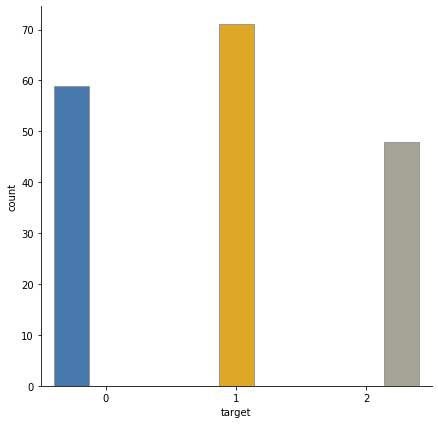

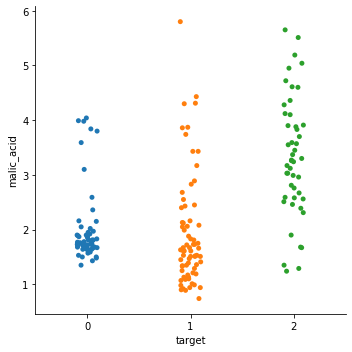

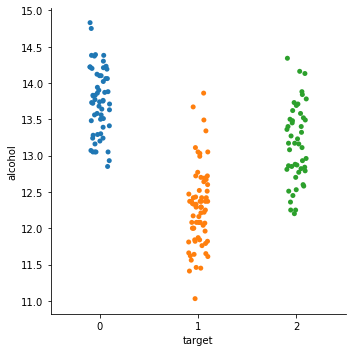

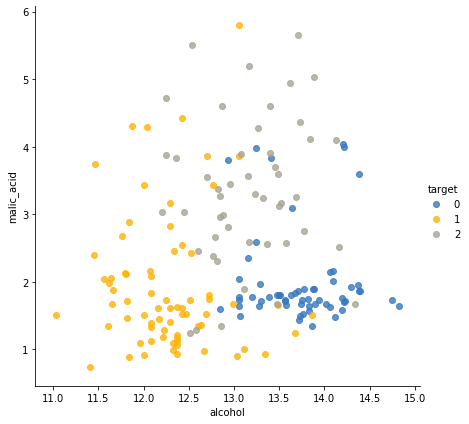

In [55]:
palette = sns.xkcd_palette(["windows blue", "amber", "greyish"])

df, data = load_wine_dataset()

sns.catplot(x="target", hue="target", kind="count", palette=palette, edgecolor=".6", height = 6, data=df)
sns.catplot(x="target", y="malic_acid", data=df);
sns.catplot(x="target", y="alcohol", data=df);

plot_2D_representation()

## Classification

During this part of the homework we will train three different classifiers, randomly splitting data into train, validation and test sets (in proportion 5:2:3)

### Train, test, eval split (5:2:3)

In [71]:
X, y, X_train, y_train, X_val, y_val, X_test, y_test = train_test_eval_split()

### K-Nearest Neighbours Classifier

K : [1, 3, 5, 7]

Definition of decision boundaries for

K = 1


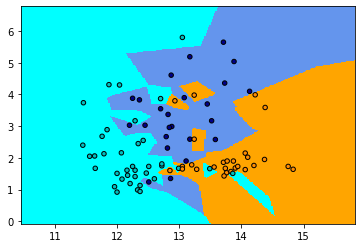

K = 3


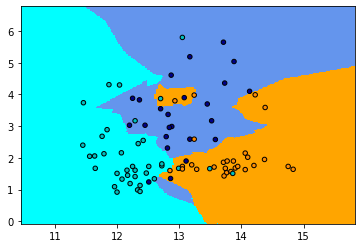

K = 5


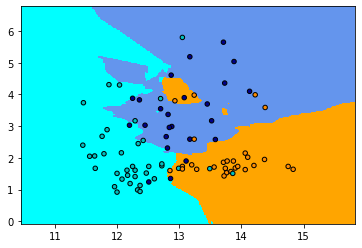

K = 7


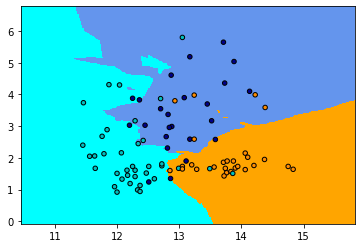

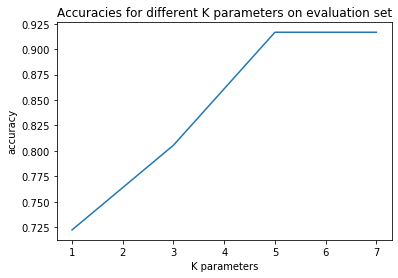

Best K found: 5
Accuracy for K = 5 on test set: 0.7777777777777778

Train data, definition of decision boundaries


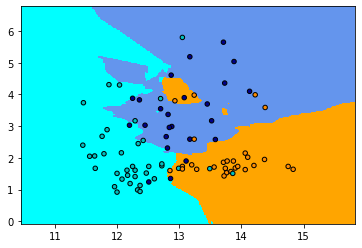

Ground truth evaluation data distribution over previously defined decision boundaries


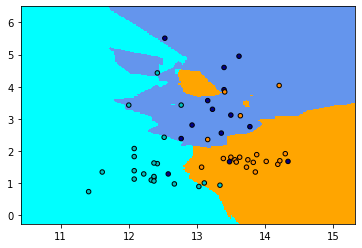

Predictions over previously defined decision boundaries


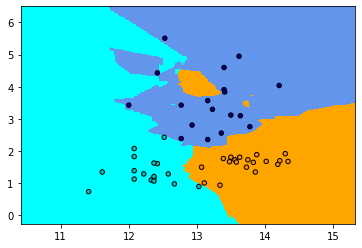

In [72]:
knn_accuracy = run_knn(X_train, y_train, X_val, y_val)
plot_accuracy_on_parameters_variation(knn_accuracy, "K parameters")
evaluate_knn_on_best_K(knn_accuracy)

#6. How the boundaries change? Why?

### Support Vector Machine
### LinearSVM

C : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
Definition of decision boundaries for

C = 0.001


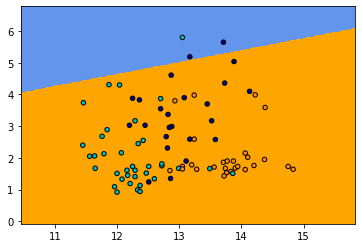

C = 0.01


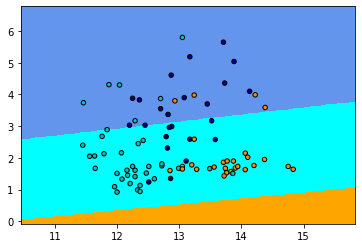

C = 0.1


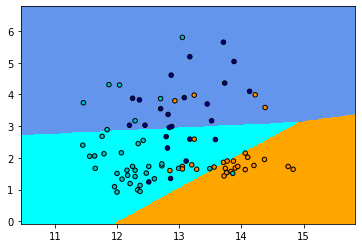

C = 1


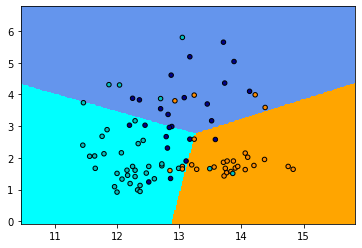

C = 10


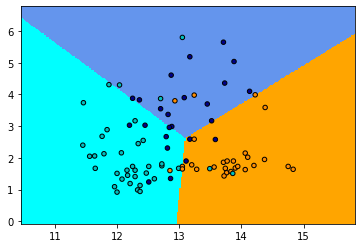

C = 100


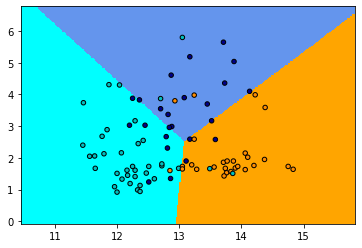

In [ ]:
linear_svm_accuracy = run_linear_svm(X_train, y_train, X_val, y_val)
plot_accuracy_on_parameters_variation(linear_svm_accuracy, "C parameters")
evaluate_linear_svm_on_best_C(linear_svm_accuracy)

#10. How the boundaries change? Why?

### RBF Kernel SVM

C : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
Definition of decision boundaries for

C = 0.001


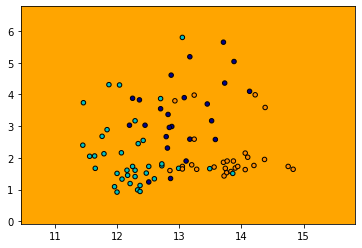

C = 0.01


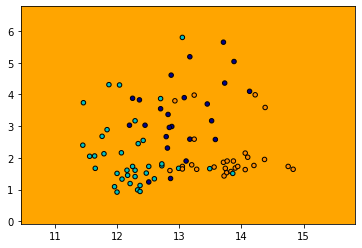

C = 0.1


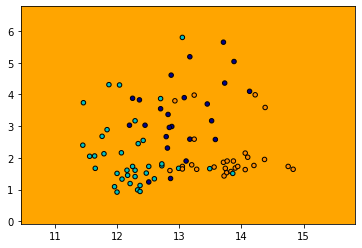

C = 1


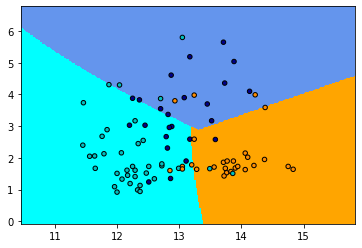

C = 10


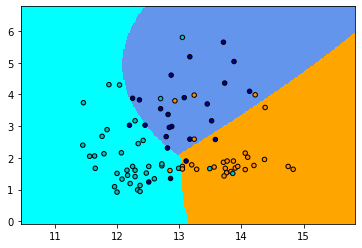

C = 100


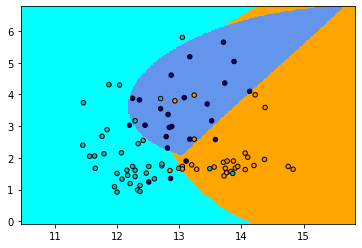

C = 1000


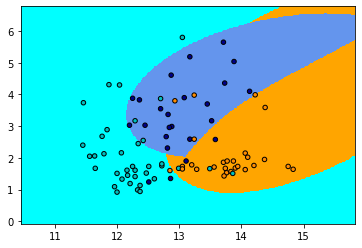

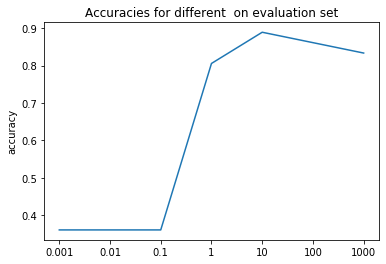

Best C found: 10
Accuracy for C = 10 on test set: 0.7407407407407407

Train data, definition of decision boundaries


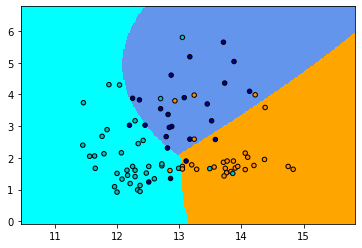

Ground truth evaluation data distribution over previously defined decision boundaries


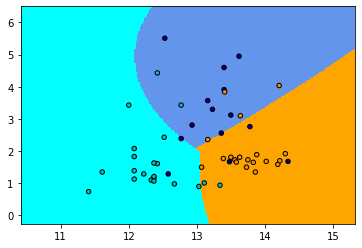

Predictions over previously defined decision boundaries


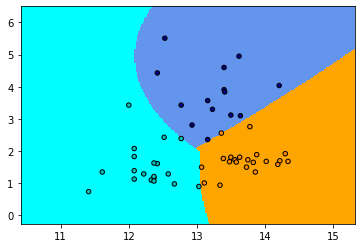

In [75]:
linear_rbf_accuracy = run_rbf_svm(X_train, y_train, X_val, y_val)
plot_accuracy_on_parameters_variation(linear_rbf_accuracy)
evaluate_rbf_svm_on_best_C(linear_rbf_accuracy)

#14. Are there any differences compared to the linear kernel? How are the boundaries different?

### Grid search on C, gamma parameters for RBF Kernel SVM

Best accuracy: 0.888889 using parameters {'C': 1000, 'gamma': 0.001}

 0.361111 with: {'C': 0.001, 'gamma': 0.001}

 0.361111 with: {'C': 0.001, 'gamma': 0.0001}

 0.361111 with: {'C': 0.01, 'gamma': 0.001}

 0.361111 with: {'C': 0.01, 'gamma': 0.0001}

 0.361111 with: {'C': 0.1, 'gamma': 0.001}

 0.361111 with: {'C': 0.1, 'gamma': 0.0001}

 0.361111 with: {'C': 1, 'gamma': 0.001}

 0.361111 with: {'C': 1, 'gamma': 0.0001}

 0.666667 with: {'C': 10, 'gamma': 0.001}

 0.361111 with: {'C': 10, 'gamma': 0.0001}

 0.833333 with: {'C': 100, 'gamma': 0.001}

 0.666667 with: {'C': 100, 'gamma': 0.0001}

 0.888889 with: {'C': 1000, 'gamma': 0.001}

 0.833333 with: {'C': 1000, 'gamma': 0.0001}
Accuracy for C = 1000 on test set: 0.7592592592592593

Train data, definition of decision boundaries


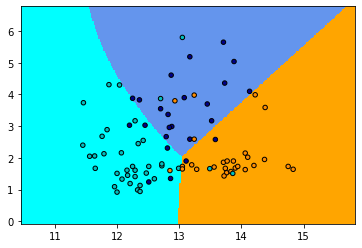

Ground truth evaluation data distribution over previously defined decision boundaries


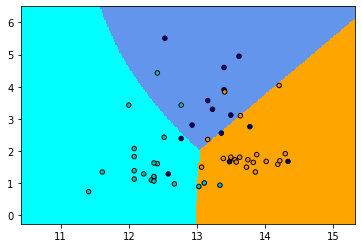

Predictions over previously defined decision boundaries


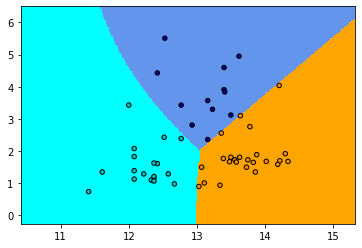

In [83]:
X = np.concatenate([X_train, X_val])
y = np.concatenate([y_train, y_val])
test_fold = [-1 for _ in range(y_train.shape[0])] + [0 for _ in range(y_val.shape[0])]
cv = PredefinedSplit(test_fold)

best_params = run_rbf_svm_grid_search(X, y, cv)
evaluate_grid_search_rbf_svm_on_best_C(best_params["C"], best_params["gamma"])

- - - - - -

#### Code

In [82]:
def load_wine_dataset():
    
    data = load_wine()

    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = pd.Series(data.target)

    return df, data

def plot_2D_representation():
   
    global palette
    
    df_splitted = df[['alcohol','malic_acid', 'target']]
    
    sns.lmplot('alcohol', 'malic_acid', hue='target', height = 6,palette=palette, data=df_splitted, fit_reg=False)

def train_test_eval_split():

    X = data.data[:,0:2]
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    validation_size = 0.2 / 0.7
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=42)    
    
    return X, y, X_train, y_train, X_val, y_val, X_test, y_test

# - - - - - - - - - - - - - - - - - -
    
# KNN

def run_knn(X_train, y_train, X_val, y_val, K = [1,3,5,7]):
    global enable_plot
    accuracy = {}
    
    print("K : " + ''.join(str(K)) + "\n")
    print("Definition of decision boundaries for\n")
    
    for k in K:
        
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)

        print("K = " + str(k))
        plot_data_and_decision_boundary(knn, X_train, y_train)
        plt.show()
        
        accuracy[k] = accuracy_score(y_val, y_pred)

    return accuracy
    
def evaluate_knn_on_best_K(accuracy):
    
    best_k = max(accuracy, key=accuracy.get)
    print("Best K found: " + str(best_k))

    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print("Accuracy for K = " + str(best_k) + " on test set: " + str(accuracy_score(y_test, y_pred)) + "\n")
    
    print("Train data, definition of decision boundaries")
    plot_data_and_decision_boundary(knn, X_train, y_train)
    
    print("Ground truth evaluation data distribution over previously defined decision boundaries")
    plot_data_and_decision_boundary(knn, X_test, y_test)
    
    print("Predictions over previously defined decision boundaries")
    plot_data_and_decision_boundary(knn, X_test, y_pred)
    
# - - - - - - - - - - - - - - - - - -
    
# LinearSVM

def run_linear_svm(X_train, y_train, X_val, y_val, C = [0.001, 0.01, 0.1, 1, 10, 100,1000]):
    accuracy = {}
    
    print("C : " + ''.join(str(C)))
    print("Definition of decision boundaries for\n")
    
    for c in C:
        
        svm = LinearSVC(C = c, max_iter = 10000000)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_val)
        
        print("C = " + str(c))
        plot_data_and_decision_boundary(svm, X_train, y_train)
        plt.show()

        accuracy[str(c)] = accuracy_score(y_val, y_pred)
        
    return accuracy  

def evaluate_linear_svm_on_best_C(accuracy):
    
    best_c = max(accuracy, key=accuracy.get)
    print("Best C found: " + best_c)

    svm = LinearSVC(C = float(best_c), max_iter = 10000000)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    print("Accuracy for C = " + best_c + " on test set: " + str(accuracy_score(y_test, y_pred)) + "\n")

    print("Train data, definition of decision boundaries")
    plot_data_and_decision_boundary(svm, X_train, y_train)
    
    print("Ground truth evaluation data distribution over previously defined decision boundaries")
    plot_data_and_decision_boundary(svm, X_test, y_test)
    
    print("Predictions over previously defined decision boundaries")
    plot_data_and_decision_boundary(svm, X_test, y_pred)

# - - - - - - - - - - - - - - - - - -
    
# RBF Kernel for SVM

def run_rbf_svm(X_train, y_train, X_val, y_val, C = [0.001, 0.01, 0.1, 1, 10, 100,1000]):
    accuracy = {}
    
    print("C : " + ''.join(str(C)))
    print("Definition of decision boundaries for\n")

    for c in C:
        
        svm = SVC(kernel = 'rbf', C = c, max_iter = 10000000)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_val)
        
        print("C = " + str(c))
        plot_data_and_decision_boundary(svm, X_train, y_train)
        plt.show()

        accuracy[str(c)] = accuracy_score(y_val, y_pred)
        
    return accuracy  

def evaluate_rbf_svm_on_best_C(accuracy):
    best_c = max(accuracy, key=accuracy.get)

    print("Best C found: " + best_c)

    svm = SVC(kernel = 'rbf', C = float(best_c), max_iter = 10000000)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    print("Accuracy for C = " + best_c + " on test set: " + str(accuracy_score(y_test, y_pred)) + "\n")

    print("Train data, definition of decision boundaries")
    plot_data_and_decision_boundary(svm, X_train, y_train)
    
    print("Ground truth evaluation data distribution over previously defined decision boundaries")
    plot_data_and_decision_boundary(svm, X_test, y_test)
    
    print("Predictions over previously defined decision boundaries")
    plot_data_and_decision_boundary(svm, X_test, y_pred)
    
def run_rbf_svm_grid_search(X, y, cv):
    param_grid = [
      {
       'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
       'gamma': [0.001, 0.0001]
      }
    ]

    svm = SVC(kernel = "rbf", max_iter = 10000000)
    grid = GridSearchCV(estimator=svm, param_grid=param_grid, cv=cv)
    grid_result = grid.fit(X, y)
    
    print("Best accuracy: %f using parameters %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    params = grid_result.cv_results_['params']
    for mean, param in zip(means, params):
        print("\n %f with: %r" % (mean, param))
        
    return grid_result.best_params_
        
def evaluate_grid_search_rbf_svm_on_best_C(C, gamma):
    svm = SVC(kernel = 'rbf', C = C, gamma = gamma,  max_iter = 10000000)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    print("Accuracy for C = " + str(C) + " on test set: " + str(accuracy_score(y_test, y_pred)) + "\n")

    print("Train data, definition of decision boundaries")
    plot_data_and_decision_boundary(svm, X_train, y_train)
    
    print("Ground truth evaluation data distribution over previously defined decision boundaries")
    plot_data_and_decision_boundary(svm, X_test, y_test)
    
    print("Predictions over previously defined decision boundaries")
    plot_data_and_decision_boundary(svm, X_test, y_pred)


# - - - - - - - - - - - - - - - - - -

def plot_data_and_decision_boundary(clf, X, y):
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
    h = .02  # step size in the mesh
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()
    
def plot_accuracy_on_parameters_variation(accuracy, x_axis_title = ""):
    accuracy_df = pd.DataFrame.from_dict(accuracy, orient='index', columns=["accuracy"])
    ax = sns.lineplot(x=accuracy_df.index, y="accuracy",data=accuracy_df)
    plt.title("Accuracies for different " + x_axis_title + " on evaluation set")
    ax.set(xlabel=x_axis_title)
    plt.show()
    plt.pause(0.1)